# Generando un dataset consistente

## Recoleción de datos

Este conjunto de datos proviene de fuentes oficiales proporcionadas por el municipio de General Pueyrredón y el Ministerio de Transporte de la Nación, así como de los datos abiertos de la Nación Argentina. Los datos han sido recopilados de manera oficial y se utilizan con fines de análisis y evaluación. Los datos presentados aquí cumplen con los estándares de Protección de la Privacidad y Protección de la Propiedad Intelectual. No contienen información personal ni sensible de ningun tipo.

## Objetivo de esta etapa
Unir los datos existentes, descartar errores de carga, generar datos faltantes a partir de datos existentes, codificar columnas, eliminar redundancia.

En esta sección, me enfocaré en la construcción de un dataset consistente y limpio a partir de los datos proporcionados. Los pasos que seguiré incluyen:

1. **Unir los datos existentes**: Combinar diferentes fuentes de datos en un único dataset coherente.
2. **Descartar errores de carga**: Identificar y eliminar cualquier error presente en los datos cargados.
3. **Generar datos faltantes a partir de datos existentes**: Utilizar técnicas de imputación para rellenar valores faltantes basándome en la información disponible.
4. **Codificar columnas**: Unificar condiciones en las categorias presentadas.
5. **Eliminar redundancia**: Identificar y remover columnas o datos que aportan siempre la misma información para simplificar el dataset y mejorar su eficiencia.

A continuación, procederé con la lectura y exploración inicial del dataset para familiarizarme con su estructura y contenido.


## Imports

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

## Preparación de datos

In [2]:
df_2020_pre = pd.read_csv("Datasets/sube-mgp-2020.csv")
df_2021_pre = pd.read_csv("Datasets/sube-mgp-2021.csv")
df_2022_pre = pd.read_csv("Datasets/sube-mgp-2022.csv", sep=";") # Este *.csv no esta separado por comas
df_2023_pre = pd.read_csv("Datasets/sube-mgp-2023.csv", sep=";") # Este *.csv no esta separado por comas
df_2024_pre = pd.read_csv("Datasets/sube-mgp-2024.csv", sep=";") # Este *.csv no esta separado por comas y devuelve type-warning

C:\Users\The Workstation\AppData\Local\Temp\ipykernel_40300\3818120686.py:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2024_pre = pd.read_csv("Datasets/sube-mgp-2024.csv", sep=";") # Este *.csv no esta separado por comas y devuelve type-warning


## Primeros pasos

Hagamos un analisis archivo a archivo para tener una evaluacion previa sobre el material de trabajo

## Dataset 2020

In [3]:
df_2020_pre

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,CANTIDAD,DATO_PRELIMINAR
0,01/01/2020,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,2154,NO
1,01/01/2020,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,1889,NO
2,01/01/2020,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_501,315,NO
3,01/01/2020,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_521,2729,NO
4,01/01/2020,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_522,4010,NO
...,...,...,...,...,...
9492,31/12/2020,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_593,3003,SI
9493,31/12/2020,TRANSPORTES 25 DE MAYO SRL,LINEA 542M,4528,SI
9494,31/12/2020,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA 717,4509,SI
9495,31/12/2020,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_511,19956,SI


2020 a primeras contiene los consumos de cada linea por cada dia del año, aunque sabemos que el consumo de transporte este año es extremadamente particular por la pandemia, los evaluaremos mas adelante.

## Dataset 2021

In [4]:
df_2021_pre

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,01/01/2021,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1466,NO
1,01/01/2021,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1119,NO
2,01/01/2021,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_501,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,406,NO
3,01/01/2021,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_521,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1408,NO
4,01/01/2021,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_522,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1471,NO
...,...,...,...,...,...,...,...,...,...,...
1501,28/02/2021,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_593,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1043,SI
1502,28/02/2021,TRANSPORTES 25 DE MAYO SRL,LINEA 542M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,2169,SI
1503,28/02/2021,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA 717,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,3410,SI
1504,28/02/2021,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_511,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,10890,SI


2021 a primeras no contiene los consumos de cada linea por cada dia del año. Por lo que podemos ver tiene los datos hasta el 28 de febrero de 2021. Faltan los datos del 1/3/2021 al 31/12/2021. Además observamos que el propio dataset indica valores preliminares.

Aqui se presenta la primer dificultad, que hacer con los datos faltantes. Lo bueno es que disponemos de estos datos en formato mensual, tal como podemos observar en la web del municipio [ [Link a la web](https://datos.mardelplata.gob.ar/?q=dataset/transporte-p%C3%BAblico-de-pasajeros/resource/dce1e822-c9a3-4829-ba3a-43194ad4332e#{}) ]

Por el momento van a ser incluidos al dataset, mas adelante los vamos a generar.

![2021](img/2021.png)

## Dataset 2022

In [5]:
df_2022_pre

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,1/1/2022,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1418,NO
1,1/1/2022,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1906,NO
2,1/1/2022,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_501,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,527,NO
3,1/1/2022,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_521,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1220,NO
4,1/1/2022,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_522,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1840,NO
...,...,...,...,...,...,...,...,...,...,...
9764,31/12/2022,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_593,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,2418,NO
9765,31/12/2022,TRANSPORTES 25 DE MAYO SRL,LINEA 542M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,3429,NO
9766,31/12/2022,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA 717,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,3868,NO
9767,31/12/2022,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_511,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,14956,NO


2022 a primeras contiene los consumos de cada linea por cada dia del año.

## Dataset 2023

In [6]:
df_2023_pre

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,1/1/2023,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
1,1/1/2023,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO
2,1/1/2023,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_501,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,119,NO
3,1/1/2023,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_521,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1302,NO
4,1/1/2023,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_522,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1920,NO
...,...,...,...,...,...,...,...,...,...,...
10205,31/12/2023,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_571_MDQ,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,7362,NO
10206,31/12/2023,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_573_MDQ,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,3018,NO
10207,31/12/2023,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_581_MDQ,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,4466,NO
10208,31/12/2023,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_591_MDQ,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,2436,NO


2023 a primeras contiene los consumos de cada linea por cada dia del año.

## Dataset 2024

In [7]:
df_2024_pre

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,1/1/2024,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1811.0,SI
1,1/1/2024,EMPRESA BATAN S.A.,BS_AS_LINEA 720M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,576.0,SI
2,1/1/2024,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1555.0,SI
3,1/1/2024,EMPRESA DE TRANSPORTE 12 DE OCTUBRE S R L,BSAS_LINEA_531,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1419.0,SI
4,1/1/2024,EMPRESA DE TRANSPORTE 12 DE OCTUBRE S R L,BSAS_LINEA_532,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,3813.0,SI
...,...,...,...,...,...,...,...,...,...,...
1011749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A simple vista observamos que 2024 tiene filas faltantes, quiza por un error de generacion de datos. Vamos a quitar las filas vacias:

In [8]:
df_2024_pre = df_2024_pre.dropna(subset=['DIA_TRANSPORTE'])
df_2024_pre

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,1/1/2024,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1811.0,SI
1,1/1/2024,EMPRESA BATAN S.A.,BS_AS_LINEA 720M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,576.0,SI
2,1/1/2024,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1555.0,SI
3,1/1/2024,EMPRESA DE TRANSPORTE 12 DE OCTUBRE S R L,BSAS_LINEA_531,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1419.0,SI
4,1/1/2024,EMPRESA DE TRANSPORTE 12 DE OCTUBRE S R L,BSAS_LINEA_532,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,3813.0,SI
...,...,...,...,...,...,...,...,...,...,...
834,3/2/2024,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_571_MDQ,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,15172.0,SI
835,3/2/2024,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_573_MDQ,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,6485.0,SI
836,3/2/2024,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_581_MDQ,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,7161.0,SI
837,3/2/2024,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_591_MDQ,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,6718.0,SI


Sin las filas vacias, observamos que 2024 posee datos entre el 1/1/24 al 3/2/24 y que la columna "CANTIDAD" no posee valores enteros.
Los datos presentan errores de carga, no estan presentes todas las lineas, y estan marcados como preliminares. Esto podria indicarnos que los datos no son confiables.

## Unimos los datasets

A partir de aqui podemos comenzar a trabajar con la union de los datasets

In [9]:
df = pd.concat([df_2020_pre, df_2021_pre, df_2022_pre, df_2023_pre, df_2024_pre], ignore_index=True)
df

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,CANTIDAD,DATO_PRELIMINAR,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO
0,01/01/2020,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,2154.0,NO,NaN,NaN,NaN,NaN,NaN
1,01/01/2020,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,1889.0,NO,NaN,NaN,NaN,NaN,NaN
2,01/01/2020,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_501,315.0,NO,NaN,NaN,NaN,NaN,NaN
3,01/01/2020,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_521,2729.0,NO,NaN,NaN,NaN,NaN,NaN
4,01/01/2020,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_522,4010.0,NO,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
31816,3/2/2024,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_571_MDQ,15172.0,SI,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON
31817,3/2/2024,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_573_MDQ,6485.0,SI,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON
31818,3/2/2024,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_581_MDQ,7161.0,SI,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON
31819,3/2/2024,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_591_MDQ,6718.0,SI,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON


## Exploremos un poco los datos

Dado que las columnas AMBA, TIPO_TRANSPORTE, JURISDICCION, PROVINCIA y MUNICIPIO son redundantes vamos a prescindir de ellas.

In [10]:
# Eliminamos columnas redundantes ya que todas aportan la misma informacion
columnas_a_eliminar = ['AMBA', 'TIPO_TRANSPORTE', 'JURISDICCION', 'PROVINCIA', 'MUNICIPIO']
df = df.drop(columns=columnas_a_eliminar)
df.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,CANTIDAD,DATO_PRELIMINAR
0,01/01/2020,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,2154.0,NO
1,01/01/2020,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,1889.0,NO
2,01/01/2020,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_501,315.0,NO
3,01/01/2020,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_521,2729.0,NO
4,01/01/2020,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_522,4010.0,NO


### Formato Fecha

Vamos a desglosar fecha por dia, mes y año.

In [11]:
# Ajustes en formato fecha
df['DIA_TRANSPORTE'] = pd.to_datetime(df['DIA_TRANSPORTE'], format='%d/%m/%Y')
df.rename(columns={'DIA_TRANSPORTE': 'DATE'}, inplace=True)

# Para una operacion mas comoda, extraemos los componentes de la fecha en columnas separadas
df['DAY'] = df['DATE'].dt.day
df['MONTH'] = df['DATE'].dt.month
df['YEAR'] = df['DATE'].dt.year

new_order = ['DATE', 'DAY', 'MONTH', 'YEAR'] + ['NOMBRE_EMPRESA', 'LINEA', 'CANTIDAD', 'DATO_PRELIMINAR']
df = df[new_order]
df

,DATE,DAY,MONTH,YEAR,NOMBRE_EMPRESA,LINEA,CANTIDAD,DATO_PRELIMINAR
0,2020-01-01,1,1,2020,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,2154.0,NO
1,2020-01-01,1,1,2020,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,1889.0,NO
2,2020-01-01,1,1,2020,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_501,315.0,NO
3,2020-01-01,1,1,2020,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_521,2729.0,NO
4,2020-01-01,1,1,2020,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_522,4010.0,NO
...,...,...,...,...,...,...,...,...
31816,2024-02-03,3,2,2024,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_571_MDQ,15172.0,SI
31817,2024-02-03,3,2,2024,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_573_MDQ,6485.0,SI
31818,2024-02-03,3,2,2024,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_581_MDQ,7161.0,SI
31819,2024-02-03,3,2,2024,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_591_MDQ,6718.0,SI


### Analicemos los valores en LINEA

Ya que LINEA es uno de nuestros datos mas importantes, vamos a buscar inconsistencia en la columna

In [12]:
df[(df['DAY'] == 1) & (df['MONTH'] == 3) & (df['LINEA'].str.contains('522'))]

,DATE,DAY,MONTH,YEAR,NOMBRE_EMPRESA,LINEA,CANTIDAD,DATO_PRELIMINAR
1584,2020-03-01,1,3,2020,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_522,6454.0,NO
12600,2022-03-01,1,3,2022,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_522,6996.0,NO
22425,2023-03-01,1,3,2023,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_522_MDQ,9385.0,NO


Como podemos observar hay lineas que cambiaron de empresa, y dichas lineas estan cargadas de forma diferente, aunque representan lo mismo. Unifiquemos los tipos de datos de la muestra. Este cambio se produjo en enero 13 de 2023, segun los datos y las fuentes consultadas. Ese dia la empresa Peralta Ramos toma el control de la flota anteriormente operada por la empresa 25 de Mayo.

## Valores unicos de LINEA

In [13]:
# Valores unicos de LINEA
df['LINEA'].unique()

array(['BS_AS_LINEA 715M', 'BS_AS_LINEA_512', 'BSAS_LINEA_501',
       'BSAS_LINEA_521', 'BSAS_LINEA_522', 'BSAS_LINEA_523',
       'BSAS_LINEA_525', 'BSAS_LINEA_531', 'BSAS_LINEA_532',
       'BSAS_LINEA_533', 'BSAS_LINEA_541', 'BSAS_LINEA_543',
       'BSAS_LINEA_551', 'BSAS_LINEA_552', 'BSAS_LINEA_553',
       'BSAS_LINEA_554', 'BSAS_LINEA_555', 'BSAS_LINEA_562',
       'BSAS_LINEA_563', 'BSAS_LINEA_571', 'BSAS_LINEA_573',
       'BSAS_LINEA_591', 'BSAS_LINEA_593', 'LINEA 542M', 'LINEA 717',
       'LINEA_511', 'LINEA_581', 'BS_AS_LINEA 720M', 'LINEA_551_MDQ',
       'LINEA_501_MDQ', 'LINEA_521_MDQ', 'LINEA_522_MDQ', 'LINEA_523_MDQ',
       'LINEA_525_MDQ', 'LINEA_541_MDQ', 'LINEA_542_MDQ', 'LINEA_543_MDQ',
       'LINEA_552_MDQ', 'LINEA_553_MDQ', 'LINEA_554_MDQ', 'LINEA_555_MDQ',
       'LINEA_562_MDQ', 'LINEA_563_MDQ', 'LINEA_571_MDQ', 'LINEA_573_MDQ',
       'LINEA_581_MDQ', 'LINEA_591_MDQ', 'LINEA_593_MDQ'], dtype=object)

### Codificando las lineas de transporte

Observamos que hay superposicion de lineas en repetidas ocaciones, esto confirma lo dicho anteriormente. Vamos a crear una nueva columna LINE_ID que agrupe las líneas similares, para esto, vamos a crear una expresion regular:

In [14]:
# Codificación de lineas por LINE_ID
def extract_line_id(linea):
    match = re.search(r'(\d+)(?:M)?', linea)
    if match:
        return int(match.group(1))
    else:
        return ''

df['LINE_ID'] = df['LINEA'].apply(extract_line_id)

La función emplea hace uso de una expresión regular **(\d+)(?:M)?**, que busca secuencias de dígitos numéricos, asumiendo que estos representan el ID de la línea. La expresión está diseñada para capturar grupos de números, donde el **(\d+)** extrae uno o más digitos consecutivos. La parte **(?:M)?** indica que puede haber una 'M' después de los números, pero no es capturada ni esencial para la coincidencia. Si la expresión encuentra una coincidencia en el texto, retorna el número como un entero; de lo contrario, retorna una cadena vacía.

Veamos si el codigo no produce errores:

In [15]:
linea_line_id_unique = df[['LINEA', 'LINE_ID']].drop_duplicates().sort_values(by='LINEA')
print(linea_line_id_unique)

                  LINEA  LINE_ID
2        BSAS_LINEA_501      501
3        BSAS_LINEA_521      521
4        BSAS_LINEA_522      522
5        BSAS_LINEA_523      523
6        BSAS_LINEA_525      525
7        BSAS_LINEA_531      531
8        BSAS_LINEA_532      532
9        BSAS_LINEA_533      533
10       BSAS_LINEA_541      541
11       BSAS_LINEA_543      543
12       BSAS_LINEA_551      551
13       BSAS_LINEA_552      552
14       BSAS_LINEA_553      553
15       BSAS_LINEA_554      554
16       BSAS_LINEA_555      555
17       BSAS_LINEA_562      562
18       BSAS_LINEA_563      563
19       BSAS_LINEA_571      571
20       BSAS_LINEA_573      573
21       BSAS_LINEA_591      591
22       BSAS_LINEA_593      593
0      BS_AS_LINEA 715M      715
28     BS_AS_LINEA 720M      720
1       BS_AS_LINEA_512      512
23           LINEA 542M      542
24            LINEA 717      717
21137     LINEA_501_MDQ      501
25            LINEA_511      511
21139     LINEA_521_MDQ      521
21140     

Observamos que el codigo anterior no produjo errores, y que efectivamente tenemos ahora correctamente las lineas de transporte codificadas.Hagamos nuevamente una busqueda por linea para comprobar:

In [16]:
df[(df['DAY'] == 1) & (df['MONTH'] == 3) & (df['LINE_ID'] == 522)]

,DATE,DAY,MONTH,YEAR,NOMBRE_EMPRESA,LINEA,CANTIDAD,DATO_PRELIMINAR,LINE_ID
1584,2020-03-01,1,3,2020,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_522,6454.0,NO,522
12600,2022-03-01,1,3,2022,TRANSPORTES 25 DE MAYO SRL,BSAS_LINEA_522,6996.0,NO,522
22425,2023-03-01,1,3,2023,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,LINEA_522_MDQ,9385.0,NO,522


Ahora si, hemos codificado las lineas de bus por su ID real. Aqui tambien podemos apreciar la falta de datos para 2021. Para hacer mas comodo lo que sigue propongo renombrar algunas columnas:

### Renombre de columnas

Algunos ajustes en los nombres y dejamos afuera LINEA, que ahora es mejor explicada por la columna LINE_ID junto a DATO_PRELIMINAR que ya no nos aporta información:

In [17]:
df.rename(columns={'NOMBRE_EMPRESA': 'COMPANY', 'CANTIDAD': 'TICKETS'}, inplace=True)
new_column_order = ['DATE', 'DAY', 'MONTH', 'YEAR', 'COMPANY', 'LINE_ID', 'TICKETS', 'DATO_PRELIMINAR']
df = df[new_column_order].copy()

Para optimizar las visualizaciones se opta por acortar las denominaciones

In [18]:
# Acortamos los nombres de las empresas
df['COMPANY'] = df['COMPANY'].replace({
    'EMPRESA DE TRANSPORTE PERALTA RAMOS SACI': 'PERALTA RAMOS',
    'TRANSPORTES 25 DE MAYO SRL': '25 DE MAYO',
    'EMPRESA BATAN S.A.': 'BATAN',
    'EMPRESA DE TRANSPORTE 12 DE OCTUBRE S R L': '12 DE OCTUBRE',
    'EL LIBERTADOR SRL': 'EL LIBERTADOR',
})

df['COMPANY'].unique()

array(['BATAN', 'PERALTA RAMOS', '25 DE MAYO', '12 DE OCTUBRE',
       'EL LIBERTADOR'], dtype=object)

Observemos la configuracion realizada en las columnas:

In [19]:
display(df)

,DATE,DAY,MONTH,YEAR,COMPANY,LINE_ID,TICKETS,DATO_PRELIMINAR
0,2020-01-01,1,1,2020,BATAN,715,2154.0,NO
1,2020-01-01,1,1,2020,PERALTA RAMOS,512,1889.0,NO
2,2020-01-01,1,1,2020,25 DE MAYO,501,315.0,NO
3,2020-01-01,1,1,2020,25 DE MAYO,521,2729.0,NO
4,2020-01-01,1,1,2020,25 DE MAYO,522,4010.0,NO
...,...,...,...,...,...,...,...,...
31816,2024-02-03,3,2,2024,PERALTA RAMOS,571,15172.0,SI
31817,2024-02-03,3,2,2024,PERALTA RAMOS,573,6485.0,SI
31818,2024-02-03,3,2,2024,PERALTA RAMOS,581,7161.0,SI
31819,2024-02-03,3,2,2024,PERALTA RAMOS,591,6718.0,SI


## Analizando los datos preliminares

Si bien no hay información disponible sobre el amnejo de datos preliminares, entendemos a estos como datos irregulares o inconsistentes. Veamos en detalle:

In [20]:
# Filtro las filas donde la columna 'DATO_PRELIMINAR' es 'SI'
datos_preliminares = df[df['DATO_PRELIMINAR'] == 'SI']

# Agrupo por 'YEAR' y 'MONTH' y contar las ocurrencias
conteo_preliminares_por_año_mes = datos_preliminares.groupby(['YEAR', 'MONTH']).size()

print(conteo_preliminares_por_año_mes)

YEAR  MONTH
2020  12       833
2021  2        753
2024  1        783
      2         56
dtype: int64


El resultado muestra que sólo algunos meses específicos de ciertos años tienen registros preliminares, lo cual habla de la falta de confinza para estos periodos en particular:

> Diciembre de 2020: 833 registros preliminares.

> Febrero de 2021: 753 registros preliminares.

> Enero de 2024: 783 registros preliminares.

> Febrero de 2024: 56 registros preliminares.

Esto corresponde con lo visto parcialmente durante la extraccion de cada dataset.

Tratemos de visualizar la linea historica para ver con que nos vamos a encontrar.

# Linea histórica de datos

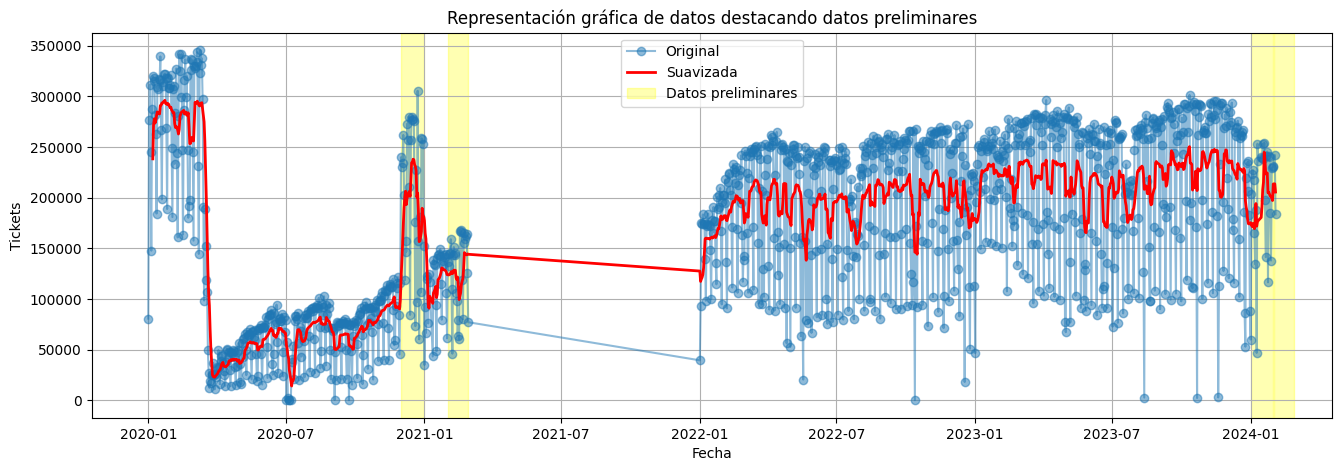

In [21]:
sel = ['TICKETS', 'DATE']
df_plot = df[sel].copy()

df_plot = df_plot.groupby('DATE')['TICKETS'].sum().reset_index()
df_plot['TICKETS_SMOOTHED'] = df_plot['TICKETS'].rolling(window=7).mean()

# Grafico la serie temporal original y la suavizada
plt.figure(figsize=(16, 5))
plt.plot(df_plot['DATE'], df_plot['TICKETS'], marker='o', label='Original', alpha=0.5)
plt.plot(df_plot['DATE'], df_plot['TICKETS_SMOOTHED'], color='red', label='Suavizada', linewidth=2)

# Añadir sombreado para los meses con datos preliminares
plt.axvspan(pd.Timestamp('2020-12-01'), pd.Timestamp('2020-12-31'), color='yellow', alpha=0.3, label='Datos preliminares')
plt.axvspan(pd.Timestamp('2021-02-01'), pd.Timestamp('2021-02-28'), color='yellow', alpha=0.3)
plt.axvspan(pd.Timestamp('2024-01-01'), pd.Timestamp('2024-01-31'), color='yellow', alpha=0.3)
plt.axvspan(pd.Timestamp('2024-02-01'), pd.Timestamp('2024-02-28'), color='yellow', alpha=0.3)

plt.title('Representación gráfica de datos destacando datos preliminares')
plt.xlabel('Fecha')
plt.ylabel('Tickets')
plt.grid(True)
plt.legend()
plt.show()

El gráfico exhibe una notable variabilidad en la cantidad de tickets de transporte a lo largo del dataset. Lo que primero notamos es la falta de datos para 2021 y las anomalias marcadas en amarillo sobre los datos preliminares. Buscando concluir en un set de datos que nos permita elaborar analisis vamos a prescindir del año 2021 ya que disponemos de los datos por mes de este periodo, asi mismo de los datos de 2024, donde obtenemos solo dos meses de informacion y en su mayoria informacion clasificada como preliminar. 

## Buscando dias sin información

Trabajar con datos no precisos nos aporta infiabilidad en los modelos predictivos y las tendencias a analizar, más aun en **series temporales**. Contabilicemos estos faltantes por fecha para abordar con detalle el problema:

In [22]:
# Creo un DataFrame con iguales fechas
date_range = pd.date_range(start='2020-01-01', end='2024-03-02')
all_dates_df = pd.DataFrame({
    'DAY': date_range.day,
    'MONTH': date_range.month,
    'YEAR': date_range.year
})

# Unimos para encontrar las fechas que faltan
merged_df = all_dates_df.merge(df, on=['DAY', 'MONTH', 'YEAR'], how='left', indicator=True)
missing_dates_df = merged_df[merged_df['_merge'] == 'left_only']

# Contamos los días faltantes por año
missing_count_per_year = missing_dates_df.groupby('YEAR').size()
print(missing_count_per_year)

YEAR
2020      1
2021    309
2022      2
2024     32
dtype: int64


> 2020: 1 faltante

> 2021: 309 faltantes

> 2022: 2 faltantes

> 2023: 0 faltantes

> 2024: 32 faltantes [Aclaracion: Este rango va del 1/1/2024 al 3/2/2024 y no son datos concluyentes, se podria afirmar que no podemos confiar en estos datos]

El hecho de contar con los datos completos para 2020, 2022 y 2023 y de ademas contar con el total de pasajes emitidos por mes durante 2021 podemos aproximar mediante una distribucion proporcional y distribuir los tickets mensuales proporcionalmente en las lineas basandonos en los patrones de los años restantes.

## Directiva sobre datos incompletos

Debido a la poca informacion disponible, que se trata de datos preliminares y que no contienen proporciones de consumo en todas las lineas, procedemos a no usar los pocos datos de 2021 y 2024. No queremos entrenar un modelo con informacion incompleta o erronea.

In [23]:
# Descartamos los años 2021 y 2024
df = df.drop(columns=['DATO_PRELIMINAR'])
df = df[(df['YEAR'] != 2021) & (df['YEAR'] != 2024)]

# Comprobamos que no esten presentes
df[(df['YEAR'] == 2021) | (df['YEAR'] == 2024)]

,DATE,DAY,MONTH,YEAR,COMPANY,LINE_ID,TICKETS


Ahora si, veamos como abordar el problema de los datos faltantes para 2021

## Obteniendo datos oficiales mensuales

Como mencionamos, los datos de 2021 estan disponibles oficialmente, pero por mes. Vamos a trabajar con esta informacion para calcular los datos faltantes.

In [24]:
monthly_data_2021 = pd.read_csv("Datasets/sube-mgp-2021-mes.csv", sep=";")
display(monthly_data_2021)


,MES,BOLETO PLANO,RESOLUCION 651,GRATUITOS SUBE
0,Enero,1.742.578,1.206.954,176.273
1,Febrero,2.004.008,1.399.245,251.362
2,Marzo,2.472.789,1.711.638,362.311
3,Abril,2.146.961,1.494.908,413.214
4,Mayo,1.510.330,1.072.958,326.536
5,Junio,477.738,2.161.217,296.690
6,Julio,1.866.498,1.424.752,390.185
7,Agosto,2.064.402,1.625.783,565.619
8,Septiembre,2.163.871,1.693.894,661.565
9,Octubre,2.389.732,1.951.151,765.983


Dichos datos vienen desglosados por el tipo de ticket por el que fueron consumidos, vamos a sumar y totalizar por mes para comenzar con la generacion de los datos.

In [25]:
# Los datos vienen desglosados, sumarlos va a ser nuestra primer tarea
# Para sumarlos, primero debemos eliminar los separadores de miles y convertir las columnas a tipo numérico
monthly_data_2021['BOLETO PLANO'] = monthly_data_2021['BOLETO PLANO'].astype(str).str.replace('.', '').astype(int)
monthly_data_2021['RESOLUCION 651'] = monthly_data_2021['RESOLUCION 651'].astype(str).str.replace('.', '').astype(int)
monthly_data_2021['GRATUITOS SUBE'] = monthly_data_2021['GRATUITOS SUBE'].astype(str).str.replace('.', '').astype(int)

# Agrego una columna 'TOTAL' que sume las columnas 'BOLETO PLANO', 'RESOLUCION 651' y 'GRATUITOS SUBE'
monthly_data_2021['TICKETS'] = monthly_data_2021['BOLETO PLANO'] + monthly_data_2021['RESOLUCION 651'] + monthly_data_2021['GRATUITOS SUBE']
monthly_data_2021['MONTH'] = range(1, len(monthly_data_2021) + 1)
monthly_data_2021[['MONTH', 'TICKETS']]
monthly_data_2021['YEAR'] = 2021
monthly_data_2021 = monthly_data_2021[['MONTH', 'YEAR', 'TICKETS']]
monthly_data_2021

,MONTH,YEAR,TICKETS
0,1,2021,3125805
1,2,2021,3654615
2,3,2021,4546738
3,4,2021,4055083
4,5,2021,2909824
5,6,2021,2668624
6,7,2021,3681435
7,8,2021,4255804
8,9,2021,4519330
9,10,2021,5106866


Bien, ya tenemos representados los datos mensuales de 2021, estos si son oficiales y finales, tal como anuncia el Ministerio de Transporte de la Nación.

# Calculando datos faltantes para 2021

### Como podemos abordar este inconveniente?

Tenemos varias maneras de generar estos datos. La que considero más adecuada, teniendo en cuenta que disponemos del consumo de transporte mensual para 2021, es utilizar los datos de 2022 como referencia. Este año refleja un uso más normalizado del transporte en comparación con 2020, que fue impactado significativamente por las restricciones de la pandemia de COVID-19. Esta decisión se basa en que los patrones de uso de 2022 ofrecen una base más estable y típica para calcular un "factor de escala". Este factor de escala se emplea para medir a los pasajeros transportados por día en cada línea de transporte en 2022 a fin de estimar los datos faltantes de 2021, asegurando que estos ajustes reflejen los totales mensuales reportados y mantengan la proporcionalidad en el uso por línea. De este modo, intento no sólo llenar el vacío en los datos con estimaciones más precisas, sino también fundamentar cualquier análisis o decisión futura sobre una base de datos más coherente y comparativamente normalizada.

Lo que vamos a relizar se podria explicar matematicamente asi:

![Proporción](img/proporcion.png)

El proceso es realtivamente simple:

Primero, voy a filtrar los datos del año 2022 para trabajar únicamente con ese año. 
Luego, calcularé el promedio diario de tickets para cada línea y mes en 2022. 
Después, sumaré estos promedios diarios por mes para obtener el total mensual de los promedios en 2022. 
A continuación, uniré estos datos con los datos de 2021, tanto los promedios diarios como los totales mensuales de 2022. Utilizando esta información, calcularé los datos diarios corregidos para 2021. 
Para finalizar, crearé un DataFrame que contenga estos datos diarios corregidos, incluyendo una columna de fecha correctamente formateada, y veremos el resultado.

In [26]:
# Filtramos los datos de 2022
df_2022 = df[df['YEAR'] == 2022].copy()

# Calculamos el promedio diario de tickets por cada LINE_ID y mes en 2022
daily_avg_2022 = df_2022.groupby(['MONTH', 'LINE_ID', 'DAY'])['TICKETS'].mean().reset_index(name='DAILY_AVG_TICKETS')

# Calculamos la suma total de los promedios diarios por mes en 2022
monthly_avg_2022 = daily_avg_2022.groupby('MONTH')['DAILY_AVG_TICKETS'].sum().reset_index(name='MONTHLY_SUM_AVG_TICKETS')

# Unimos los datos de 2021 con los promedios diarios y la suma total de los promedios diarios de 2022
data_2021_with_avg = pd.merge(monthly_data_2021, daily_avg_2022, on='MONTH')
data_2021_with_avg = pd.merge(data_2021_with_avg, monthly_avg_2022, on='MONTH', suffixes=('', '_2022'))

# Calculamos los datos diarios corregidos de 2021
data_2021_with_avg['DAILY_TICKETS_2021'] = data_2021_with_avg['TICKETS'] * (data_2021_with_avg['DAILY_AVG_TICKETS'] / data_2021_with_avg['MONTHLY_SUM_AVG_TICKETS'])

# Creamos un DataFrame con los datos diarios corregidos de 2021
data_2021_with_avg['YEAR'] = 2021
data_2021_with_avg['DATE'] = pd.to_datetime(data_2021_with_avg['YEAR'].astype(str) + '-' + data_2021_with_avg['MONTH'].astype(str) + '-' + data_2021_with_avg['DAY'].astype(str), format='%Y-%m-%d')

data_2021_daily = data_2021_with_avg[['DATE', 'YEAR', 'MONTH', 'DAY', 'LINE_ID', 'DAILY_TICKETS_2021']].rename(columns={'DAILY_TICKETS_2021': 'TICKETS'})
display(data_2021_daily)

,DATE,YEAR,MONTH,DAY,LINE_ID,TICKETS
0,2021-01-01,2021,1,1,501,331.943782
1,2021-01-02,2021,1,2,501,830.174393
2,2021-01-03,2021,1,3,501,1134.403704
3,2021-01-04,2021,1,4,501,1087.793002
4,2021-01-05,2021,1,5,501,2633.504656
...,...,...,...,...,...,...
9764,2021-12-31,2021,12,31,717,3577.151776
9765,2021-12-10,2021,12,10,720,253.396998
9766,2021-12-15,2021,12,15,720,560.432776
9767,2021-12-16,2021,12,16,720,276.517162


Bien, propongo contrastar estos nuevos datos, con el total mensualizado por mes provisto:

In [27]:
# Sumo datos diarios por mes en 2021
monthly_corrected_2021 = data_2021_daily.groupby('MONTH')['TICKETS'].sum().reset_index()

# Traigo los datos informados por mes para 2021
monthly_informed_2021 = monthly_data_2021.groupby('MONTH')['TICKETS'].sum().reset_index()

# Unir las dos tablas para comparación
compare = pd.merge(monthly_informed_2021, monthly_corrected_2021, on='MONTH', suffixes=('_OFICIALES', '_GENERADOS'))
display(compare)

,MONTH,TICKETS_OFICIALES,TICKETS_GENERADOS
0,1,3125805,3125805.0
1,2,3654615,3654615.0
2,3,4546738,4546738.0
3,4,4055083,4055083.0
4,5,2909824,2909824.0
5,6,2668624,2668624.0
6,7,3681435,3681435.0
7,8,4255804,4255804.0
8,9,4519330,4519330.0
9,10,5106866,5106866.0


A simple vista el resultado es favorable, veamos a lo largo de un año la evoluciôn de una linea de transporte en particular:

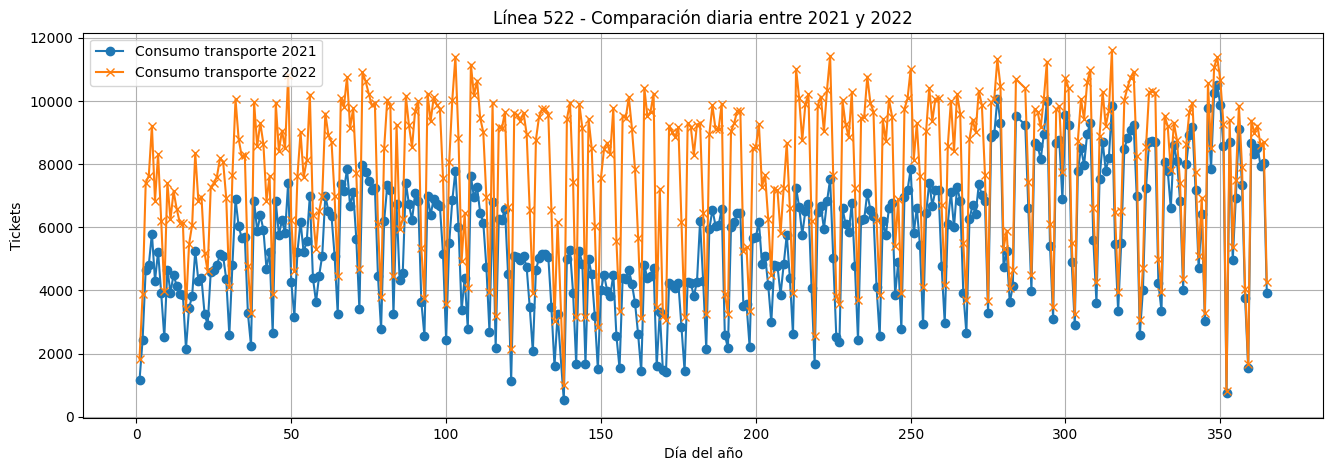

In [28]:
line_id = 522 # Filtrar los datos de la línea específica 511
filtered_2021_line = data_2021_daily[data_2021_daily['LINE_ID'] == line_id].copy()
filtered_2022_line = df_2022[df_2022['LINE_ID'] == line_id].copy()

# Calculo el día del año para 2021 / 2
filtered_2022_line['DAY_OF_YEAR'] = filtered_2022_line['DATE'].dt.dayofyear
filtered_2021_line['DAY_OF_YEAR'] = filtered_2021_line['DATE'].dt.dayofyear

# Graficar los datos diarios de 2021 y los datos reales de 2022 para la línea elegida
plt.figure(figsize=(16, 5))
plt.plot(filtered_2021_line['DAY_OF_YEAR'], filtered_2021_line['TICKETS'], label='Consumo transporte 2021', marker='o')
plt.plot(filtered_2022_line['DAY_OF_YEAR'], filtered_2022_line['TICKETS'], label='Consumo transporte 2022', marker='x')

plt.xlabel('Día del año')
plt.ylabel('Tickets')
plt.title(f'Línea {line_id} - Comparación diaria entre 2021 y 2022')
plt.legend()
plt.grid(True)
plt.show()

Bien, solo nos queda incorporar esta nueva informacion al nuestro df, para esto primero generamos un diccionario de COMPANY:

In [29]:
# Hago un diccionario de empresas de transporte y lineas de 2022
company_dict = df_2022[['LINE_ID', 'COMPANY']].drop_duplicates().set_index('LINE_ID')['COMPANY'].to_dict()
print(company_dict)

{715: 'BATAN', 512: 'PERALTA RAMOS', 501: '25 DE MAYO', 521: '25 DE MAYO', 522: '25 DE MAYO', 523: '25 DE MAYO', 525: '25 DE MAYO', 531: '12 DE OCTUBRE', 532: '12 DE OCTUBRE', 533: '12 DE OCTUBRE', 541: '25 DE MAYO', 543: '25 DE MAYO', 551: '25 DE MAYO', 552: '25 DE MAYO', 553: '25 DE MAYO', 554: '25 DE MAYO', 555: '25 DE MAYO', 562: 'EL LIBERTADOR', 563: 'EL LIBERTADOR', 571: '25 DE MAYO', 573: '25 DE MAYO', 591: '25 DE MAYO', 593: '25 DE MAYO', 542: '25 DE MAYO', 717: 'PERALTA RAMOS', 511: 'PERALTA RAMOS', 581: '25 DE MAYO', 720: 'BATAN'}


Creamos la columna COMPANY y buscamos los datos en el diccionario:

In [30]:
data_2021_daily['COMPANY'] = data_2021_daily['LINE_ID'].map(company_dict)
data_2021_daily

,DATE,YEAR,MONTH,DAY,LINE_ID,TICKETS,COMPANY
0,2021-01-01,2021,1,1,501,331.943782,25 DE MAYO
1,2021-01-02,2021,1,2,501,830.174393,25 DE MAYO
2,2021-01-03,2021,1,3,501,1134.403704,25 DE MAYO
3,2021-01-04,2021,1,4,501,1087.793002,25 DE MAYO
4,2021-01-05,2021,1,5,501,2633.504656,25 DE MAYO
...,...,...,...,...,...,...,...
9764,2021-12-31,2021,12,31,717,3577.151776,PERALTA RAMOS
9765,2021-12-10,2021,12,10,720,253.396998,BATAN
9766,2021-12-15,2021,12,15,720,560.432776,BATAN
9767,2021-12-16,2021,12,16,720,276.517162,BATAN


Por ultimo volcamos 2021 a nuestro df principal:

In [31]:
# Unimos data_2021_daily con el df original
df_combined = pd.concat([df, data_2021_daily], ignore_index=True)

# Ordenar el DataFrame combinado por la columna DATE
df_sorted = df_combined.sort_values(by='DATE').reset_index(drop=True)

# Guardar el DataFrame combinado y ordenado en un archivo CSV
df = df_sorted.copy()

df = df.sort_values(by=['DATE', 'LINE_ID'])
df['TICKETS'] = df['TICKETS'].astype(int) # Aseguramos enteros para TICKETS
display(df)

,DATE,DAY,MONTH,YEAR,COMPANY,LINE_ID,TICKETS
17,2020-01-01,1,1,2020,25 DE MAYO,501,315
2,2020-01-01,1,1,2020,PERALTA RAMOS,511,11463
16,2020-01-01,1,1,2020,PERALTA RAMOS,512,1889
18,2020-01-01,1,1,2020,25 DE MAYO,521,2729
21,2020-01-01,1,1,2020,25 DE MAYO,522,4010
...,...,...,...,...,...,...,...
39226,2023-12-31,31,12,2023,PERALTA RAMOS,591,2436
39227,2023-12-31,31,12,2023,PERALTA RAMOS,593,2089
39242,2023-12-31,31,12,2023,BATAN,715,2349
39236,2023-12-31,31,12,2023,PERALTA RAMOS,717,3375


Ultima revision visual:

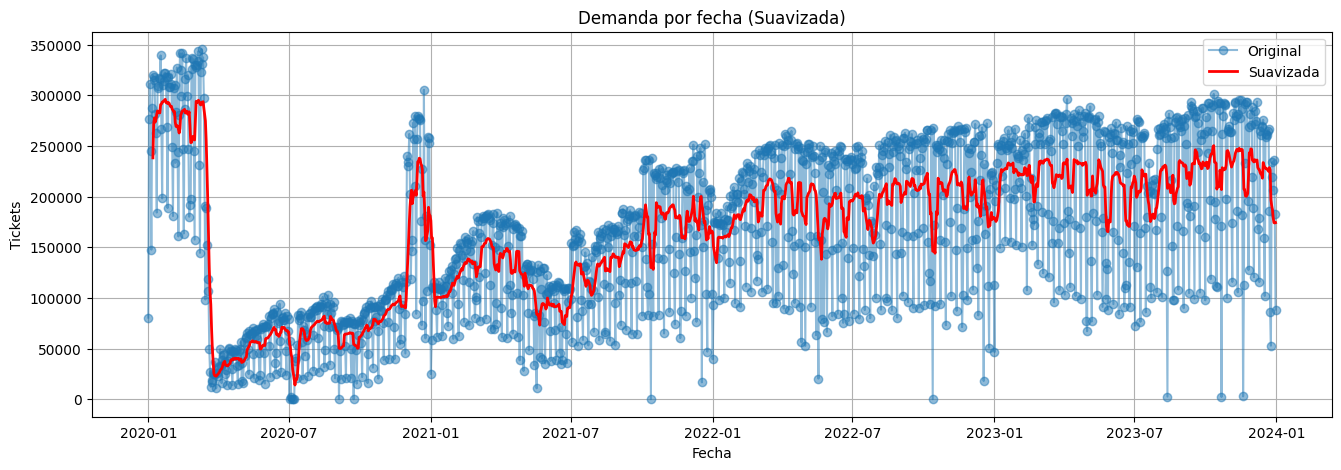

In [32]:
# Graficamos la informacion generada
sel = ['TICKETS', 'DAY', 'MONTH', 'YEAR']
df_plot = df[sel].copy()
df_plot['DATE'] = pd.to_datetime(df_plot[['YEAR', 'MONTH', 'DAY']])

df_plot = df_plot.groupby('DATE')['TICKETS'].sum().reset_index()
df_plot['TICKETS_SMOOTHED'] = df_plot['TICKETS'].rolling(window=7).mean()

# Graficar la serie temporal original y la suavizada
plt.figure(figsize=(16, 5))
plt.plot(df_plot['DATE'], df_plot['TICKETS'], marker='o', label='Original', alpha=0.5)
plt.plot(df_plot['DATE'], df_plot['TICKETS_SMOOTHED'], color='red', label='Suavizada', linewidth=2)
plt.title('Demanda por fecha (Suavizada)')
plt.xlabel('Fecha')
plt.ylabel('Tickets')
plt.grid(True)
plt.legend()
plt.show()

## Generación del set de datos

Evaluamos que no existan errores producidos luego de la correción del tipo de dato:

In [33]:
print(df[df.isna().any(axis=1)])

Empty DataFrame
Columns: [DATE, DAY, MONTH, YEAR, COMPANY, LINE_ID, TICKETS]
Index: []


In [34]:
print(df.dtypes)

DATE       datetime64[ns]
DAY                 int32
MONTH               int64
YEAR                int64
COMPANY            object
LINE_ID             int64
TICKETS             int32
dtype: object


Por ultimo guardamos nuestro dataset

In [35]:
# Guardamos nuestro dataset
df.to_csv('Datasets/sube.csv', index=False)

La generación de datos diarios para el año 2021, a partir de los totales mensuales oficiales, ha resultado en una distribución proporcional que explica muy bien los valores oficiales mensuales proporcionados por el Ministerio de Transporte.

Este abordaje propone una buena base para análisis más granulares y el posterior modelado predictivo.